In [32]:
import numpy as np
from scipy.ndimage.filters import generic_filter as gf
from PIL import Image
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
import scipy.stats.mstats as ms
import scipy.ndimage.morphology as morph

To extract neighbors a mask is created that will be moved over the image to create new features.

In [2]:
def create_circular_mask(radius):
    kernel = np.zeros((2*radius+1, 2*radius+1))
    y,x = np.ogrid[-radius:radius+1, -radius:radius+1]
    mask = x**2 + y**2 <= radius**2
    mask[radius][radius] = 0
    kernel[mask] = 1
    return kernel

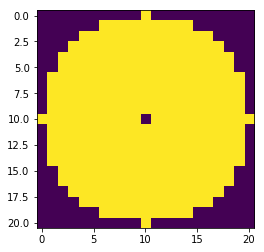

In [3]:
#Example of mask
plt.imshow(create_circular_mask(10))

In [5]:
#im = Image.open("croppedImage_skyview130x130.tif")
#arr = np.asarray(im)
mask = create_circular_mask(2)

#for row in arr:
#    for pixel in row:
#        if pixel < 0.5:
#            print(pixel)
#            print(np.where(arr == pixel))

#plt.figure(num=None, figsize=(28,16), facecolor='w', edgecolor='k')
#ax = [plt.subplot(1,1,i+1) for i in range(1)]
#for a in ax:
 #   a.set_xticklabels([])
  #  a.set_yticklabels([])
   # a.tick_params(bottom=False, left=False)
#plt.subplots_adjust(wspace=0,hspace=0)

#ax[0].title.set_text("Original")
#ax[0].imshow(arr)

#ax[1].title.set_text("Median")
#ax[1].imshow(gf(arr,np.nanmedian,footprint=mask))

#ax[2].title.set_text("Mean")
#ax[2].imshow(gf(arr,np.nanmean,footprint=mask))

#ax[3].title.set_text("Standard deviation")
#ax[3].imshow(gf(arr,np.nanstd,footprint=mask))

#ax[4].title.set_text("Maximum")
#ax[4].imshow(gf(arr,ms.tmax,footprint=mask))

#ax[5].title.set_text("Skew")
#ax[5].imshow(gf(arr,ms.skew,footprint=mask))

#ax[6].title.set_text("variance")
#ax[6].imshow(gf(arr,ms.trimmed_var,footprint=mask))

#ax[7].title.set_text("Standard error of the mean")
#ax[7].imshow(gf(arr,ms.sem,footprint=mask))

4879


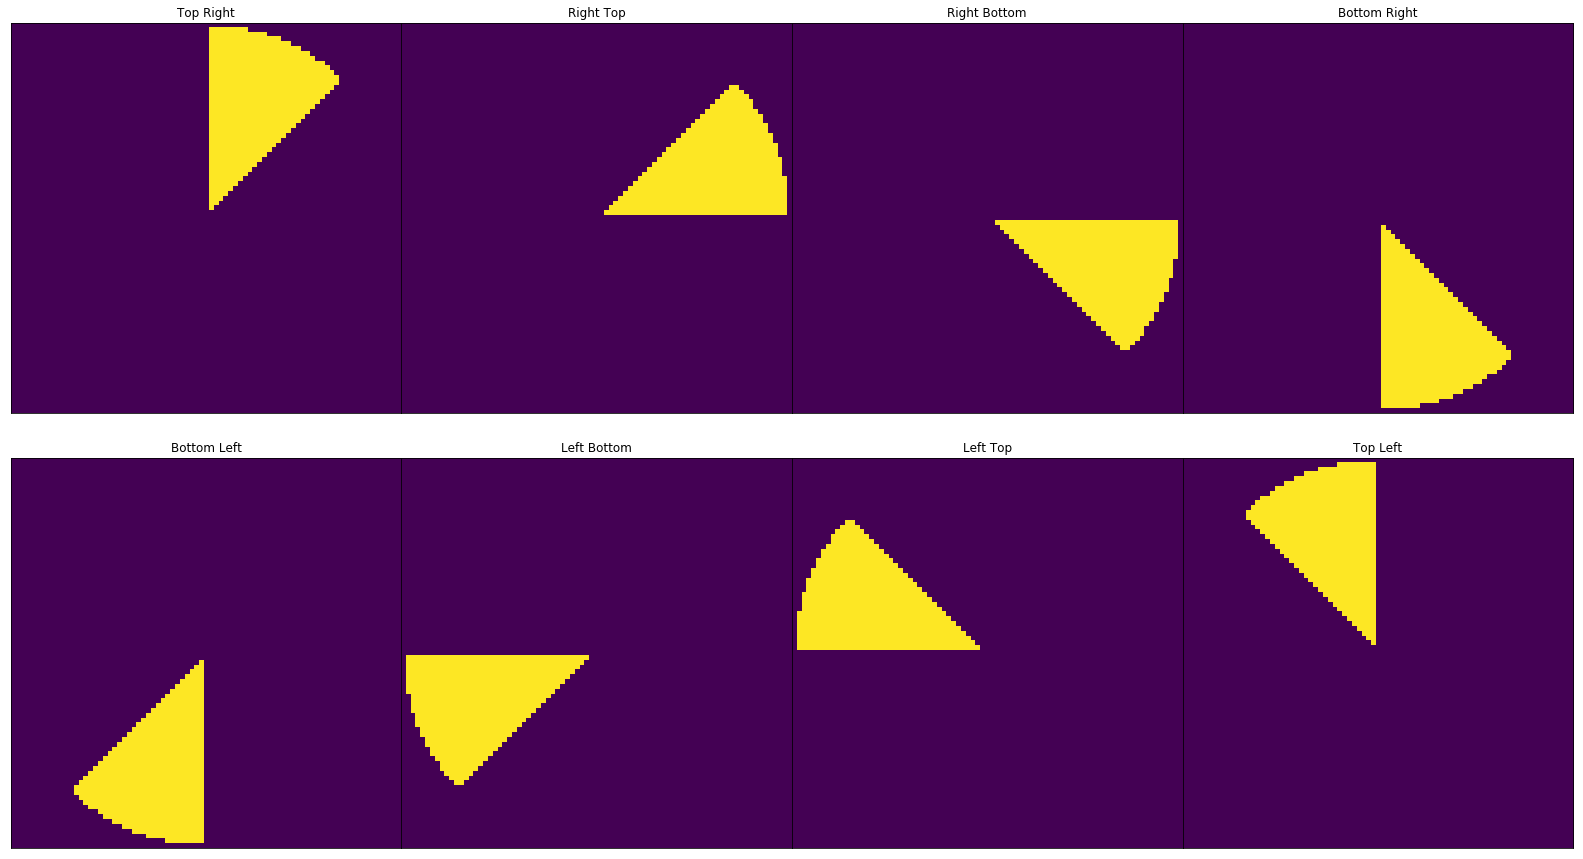

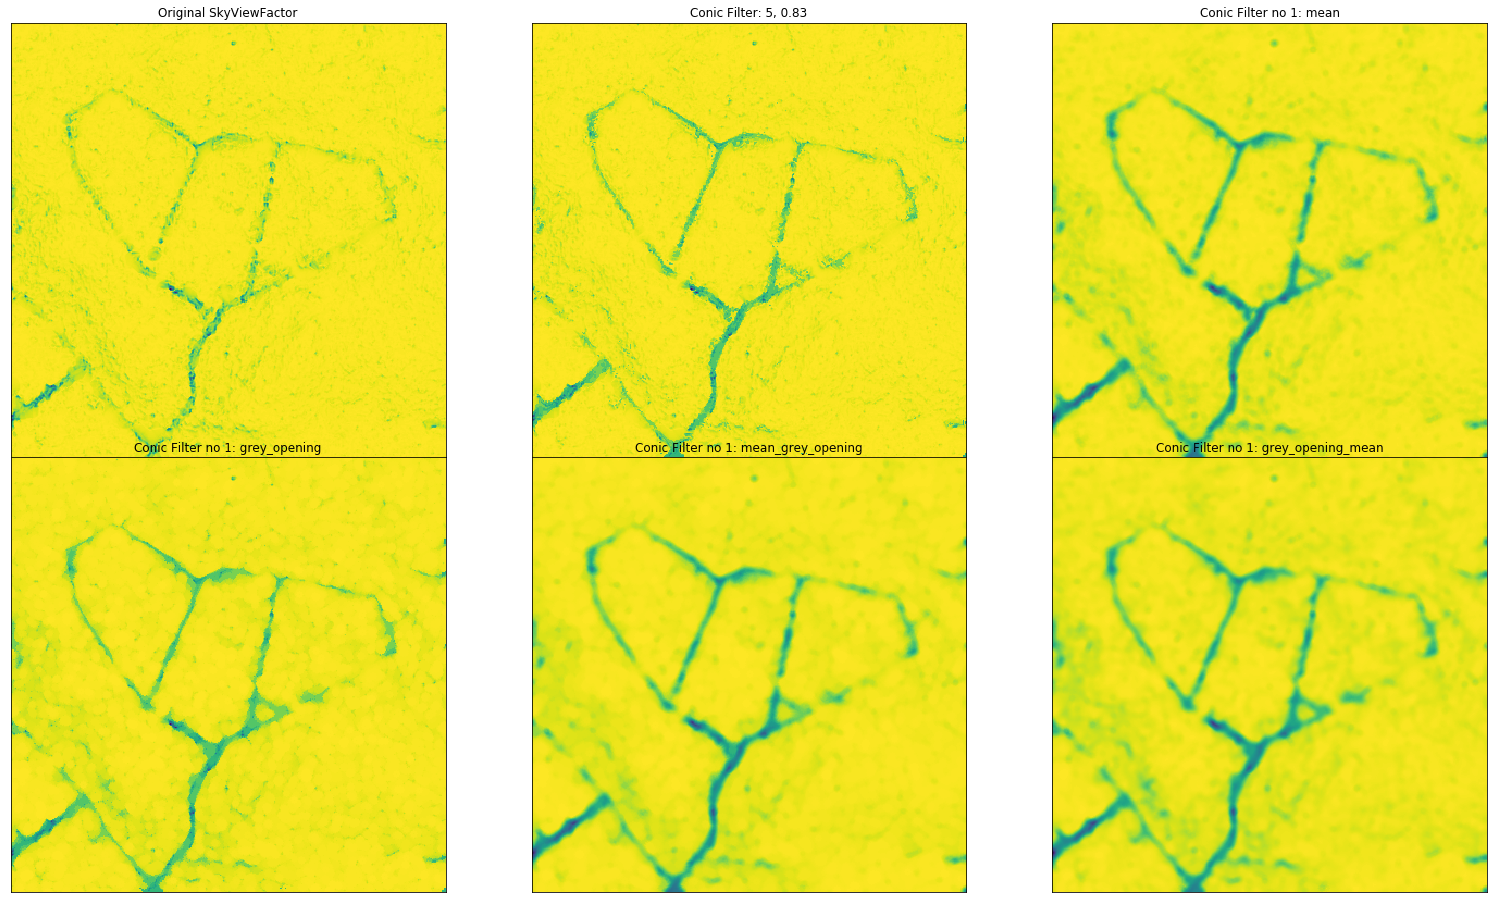

In [44]:
#im = Image.open("cropped_data/croppedImage_skyview130x130.tif")
#im = Image.open("croppedImage_skyview200x200.tif")
#im = Image.open("cropped_data/croppedImage_impoundment400x400.tif")
im = Image.open("cropped_data/croppedImage_skyview400x400.tif")
#im = Image.open("croppedImage_skyview2500x2500.tif")
#im = Image.open("croppedImage_skyview1000x1000.tif")
arr = np.asarray(im)

def create_conic_mask(radius, direction):
    kernel = np.zeros((2*radius+1, 2*radius+1))
    y,x = np.ogrid[-radius:radius+1, -radius:radius+1]
    
    if direction == 0: #topright
        mask = (x > y) & (x < abs(y)) & (x**2 + y**2 <= radius**2) & (x > 0)
    elif direction == 1: #righttop
        mask = (x > abs(y)) & (x**2 + y**2 <= radius**2) & (y < 0)
    elif direction == 2: #rightbottom
        mask = (x > abs(y)) & (x**2 + y**2 <= radius**2) & (y > 0)
    elif direction == 3: #bottomright
        mask = (abs(x) < y) & (x**2 + y**2 <= radius**2) & (x > 0)
    elif direction == 4: #bottomleft
        mask = (abs(x) < y) & (x**2 + y**2 <= radius**2) & (x < 0)
    elif direction == 5: #leftbottom
        mask = (abs(x) > abs(y)) & (x < abs(y)) & (x**2 + y**2 <= radius**2) & (y > 0)
    elif direction == 6: #lefttop
        mask = (abs(x) > abs(y)) & (x < abs(y)) & (x**2 + y**2 <= radius**2) & (y < 0)
    elif direction == 7: #topleft
        mask = (x > y) & (x < abs(y)) & (x**2 + y**2 <= radius**2) & (x < 0)
    kernel[mask] = 1
    return kernel

def conicMean(arr, maskRadius, threshold):
    masks = []
    for i in range(0, 8):
        masks.append(create_conic_mask(maskRadius, i))
    newArr = arr.copy()
    amountOfThresholds = 0
    for i in range(len(arr)):
        for j in range(len(arr[i])):
            topRight = meanFromMask(arr, (i, j), masks[0])
            rightTop = meanFromMask(arr, (i, j), masks[1])
            rightBottom = meanFromMask(arr, (i, j), masks[2])
            bottomRight = meanFromMask(arr, (i, j), masks[3])
            bottomLeft = meanFromMask(arr, (i, j), masks[4])
            leftBottom = meanFromMask(arr, (i, j), masks[5])
            leftTop = meanFromMask(arr, (i, j), masks[6])
            topLeft = meanFromMask(arr, (i, j), masks[7])
            if topRight < threshold:
                if bottomLeft < threshold:
                    amountOfThresholds += 1
                    if topRight < bottomLeft:
                        newValue = topRight
                    else:
                        newValue = bottomLeft
                    if newValue < 0.75:
                        newValue = 0.85
                    elif newValue < 0.80:
                        newValue = 0.88
                    elif newValue < 0.85:
                        newValue = 0.91
                    elif newValue < 0.90:
                        newValue = 0.93
                    else:
                        newValue = 0.95
                    newArr[i][j] = newValue
            
            elif rightTop < threshold:
                if leftBottom < threshold:
                    amountOfThresholds += 1
                    if rightTop < leftBottom:
                        newValue = rightTop
                    else:
                        newValue = leftBottom
                    if newValue < 0.75:
                        newValue = 0.85
                    elif newValue < 0.80:
                        newValue = 0.88
                    elif newValue < 0.85:
                        newValue = 0.91
                    elif newValue < 0.90:
                        newValue = 0.93
                    else:
                        newValue = 0.95
                    newArr[i][j] = newValue
            
            elif rightBottom < threshold:
                if leftTop < threshold:
                    amountOfThresholds += 1
                    if rightBottom < leftTop:
                        newValue = rightBottom
                    else:
                        newValue = leftTop
                    if newValue < 0.75:
                        newValue = 0.85
                    elif newValue < 0.80:
                        newValue = 0.88
                    elif newValue < 0.85:
                        newValue = 0.91
                    elif newValue < 0.90:
                        newValue = 0.93
                    else:
                        newValue = 0.95
                    newArr[i][j] = newValue
            
            elif bottomRight < threshold:
                if topLeft < threshold:
                    amountOfThresholds += 1
                    if bottomRight < topLeft:
                        newValue = bottomRight
                    else:
                        newValue = topLeft
                    if newValue < 0.75:
                        newValue = 0.85
                    elif newValue < 0.80:
                        newValue = 0.88
                    elif newValue < 0.85:
                        newValue = 0.91
                    elif newValue < 0.90:
                        newValue = 0.93
                    else:
                        newValue = 0.95
                    newArr[i][j] = newValue
            
            if newArr[i][j] > arr[i][j]:
                newArr[i][j] = arr[i][j]
    print(amountOfThresholds)        
    return newArr

def meanFromMask(arr, index, mask):
    elementAmount = 1
    row = index[0]
    col = index[1]
    
    halfMask = len(mask) // 2
    
    arrLen = len(arr)
        
    elementSum = 0
    for i in range(-halfMask , halfMask):
        for j in range(-halfMask , halfMask):
            if arrLen - 2 > col + j or col + j >= 0 or arrLen - 2 > row + i or row + i >= 0:
                if mask[i + halfMask][j + halfMask] == 1:
                    #print(row + i)
                    #print(col + j)
                    if row + i < arrLen:
                        if col + j < arrLen:
                            elementSum += arr[row + i][col + j]
                            elementAmount += 1
    return elementSum / elementAmount

plt.figure(num=None, figsize=(28,16), facecolor='w', edgecolor='k')
ax = [plt.subplot(2,4,i+1) for i in range(8)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0,hspace=0)

ax[0].title.set_text("Top Right")
ax[0].imshow(create_conic_mask(40, 0))
ax[1].title.set_text("Right Top")
ax[1].imshow(create_conic_mask(40, 1))
ax[2].title.set_text("Right Bottom")
ax[2].imshow(create_conic_mask(40, 2))
ax[3].title.set_text("Bottom Right")
ax[3].imshow(create_conic_mask(40, 3))
ax[4].title.set_text("Bottom Left")
ax[4].imshow(create_conic_mask(40, 4))
ax[5].title.set_text("Left Bottom")
ax[5].imshow(create_conic_mask(40, 5))
ax[6].title.set_text("Left Top")
ax[6].imshow(create_conic_mask(40, 6))
ax[7].title.set_text("Top Left")
ax[7].imshow(create_conic_mask(40, 7))



#print(len(masks))
#for mask in masks:
#    print(mask)

newConicArr = conicMean(arr, 5, 0.83)

#newNewConicArr = conicMean(newConicArr, 5, 0.82)
#count = 0
#for row in arr:
#    for pixel in row:
#        if pixel < 0.95:
#            count +=1
#            print(pixel)
#print("count:")        
#print(count)

circ_mask = create_circular_mask(3)

plt.figure(num=None, figsize=(28,16), facecolor='w', edgecolor='k')
ax = [plt.subplot(2,3,i+1) for i in range(6)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0,hspace=0)

ax[0].title.set_text("Original SkyViewFactor")
ax[0].imshow(arr)

ax[1].title.set_text("Conic Filter: 5, 0.83")
ax[1].imshow(newConicArr)

ax[2].title.set_text("Conic Filter no 1: mean")
ax[2].imshow(gf(newConicArr,np.nanmean,footprint=circ_mask))

ax[3].title.set_text("Conic Filter no 1: grey_opening")
ax[3].imshow(morph.grey_opening(newConicArr, footprint=circ_mask))

ax[4].title.set_text("Conic Filter no 1: mean_grey_opening")
ax[4].imshow(morph.grey_opening(gf(newConicArr,np.nanmean,footprint=circ_mask), footprint=circ_mask))

ax[5].title.set_text("Conic Filter no 1: grey_opening_mean")
ax[5].imshow(gf(morph.grey_opening(newConicArr,footprint=circ_mask),np.nanmean,footprint=circ_mask))

#ax[4].title.set_text("Conic Filter standard deviation")
#ax[4].imshow(gf(newConicArr,np.nanstd,footprint=circ_mask))

#ax[5].title.set_text("Conic Filter maximum")
#ax[5].imshow(gf(newConicArr,ms.tmax,footprint=circ_mask))

#ax[6].title.set_text("Conic Filter skew")
#ax[6].imshow(gf(newConicArr,ms.skew,footprint=circ_mask))

#ax[7].title.set_text("Conic Filter variance")
#ax[7].imshow(gf(newConicArr,ms.trimmed_var,footprint=circ_mask))

#ax[8].title.set_text("Conic Filterstandard error of the mean")
#ax[8].imshow(gf(newConicArr,ms.sem,footprint=circ_mask))

#plt.savefig('conic_test_2500x2500.eps', format='eps', dpi='figure')

#ax[4].title.set_text("Conic Filter standard deviation")
#ax[4].imshow(gf(newConicArr,np.nanstd,footprint=circ_mask))

#ax[5].title.set_text("Conic Filter maximum")
#ax[5].imshow(gf(newConicArr,ms.tmax,footprint=circ_mask))

#ax[6].title.set_text("Conic Filter skew")
#ax[6].imshow(gf(newConicArr,ms.skew,footprint=circ_mask))

#ax[7].title.set_text("Conic Filter variance")
#ax[7].imshow(gf(newConicArr,ms.trimmed_var,footprint=circ_mask))

#ax[8].title.set_text("Conic Filterstandard error of the mean")
#ax[8].imshow(gf(newConicArr,ms.sem,footprint=circ_mask))

#plt.savefig('conic_test_2500x2500.eps', format='eps', dpi='figure')